In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from scipy.integrate import odeint 
import math 

#**Primera parte**

### Los enunciados planteados son tomados del libro "Computational problems for physicist" de Manuel Paez et al.

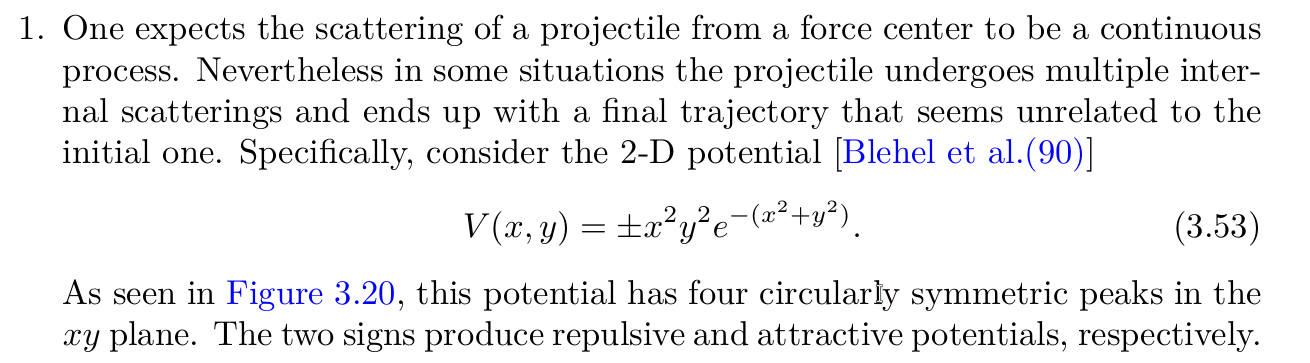

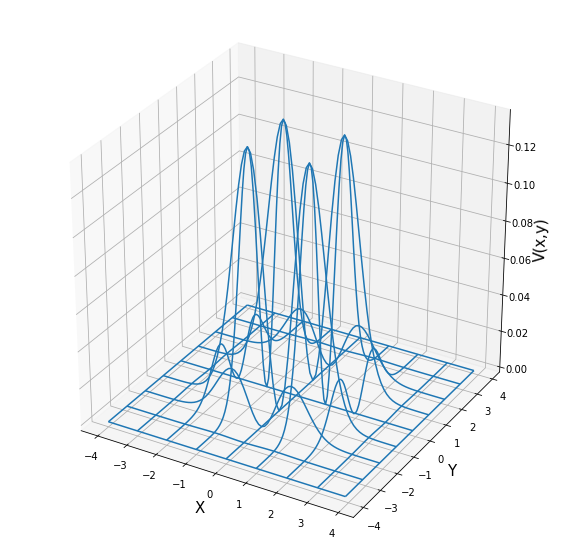

In [0]:
#Grafico del potencial
def V(x,y):
    P=(x**2)*(y**2)*(np.exp(-x**2-y**2))
    return P
x=np.arange(-4,4,0.1)
y=np.arange(-4,4,0.1)
X, Y = np.meshgrid(x, y)
Z=V(X,Y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlabel("X",size=15)
ax.set_ylabel("Y",size=15)
ax.set_zlabel("V(x,y)",size=15)
plt.savefig('Potential.png')
plt.savefig('Potential.pdf')
plt.show()

### Las ecuaciones de movimiento que describen el sistema estran dadas por:

# $m\frac{\mathrm{d}^2 x}{\mathrm{d} t^2}=2y^2x(1-x^2) e^{-(x^2+y^2)}$
# $m\frac{\mathrm{d}^2 y}{\mathrm{d} t^2}=2x^2y(1-y^2) e^{-(x^2+y^2)}$

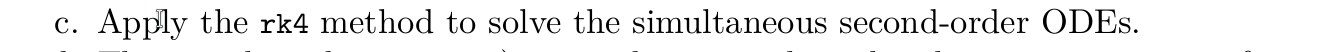

In [0]:
def RK4(yn,tn,h,F):
    k1_1,k1_2,k1_3,k1_4 = h*F([yn[0],yn[1],yn[2],yn[3]],tn)[0], h*F([yn[0],yn[1],yn[2],yn[3]],tn)[1],h*F([yn[0],yn[1],yn[2],yn[3]],tn)[2],h*F([yn[0],yn[1],yn[2],yn[3]],tn)[3] 
    k2_1,k2_2,k2_3,k2_4 = h*F([yn[0] + h*0.5*k1_1,yn[1] + h*0.5*k1_2,yn[2] + h*0.5*k1_3,yn[3] + h*0.5*k1_4], tn + 0.5*h)[0], h*F([yn[0] + h*0.5*k1_1,yn[1] + h*0.5*k1_2,yn[2] + h*0.5*k1_3,yn[3] + h*0.5*k1_4], tn + 0.5*h)[1],h*F([yn[0] + h*0.5*k1_1,yn[1] + h*0.5*k1_2,yn[2] + h*0.5*k1_3,yn[3] + h*0.5*k1_4], tn + 0.5*h)[2],h*F([yn[0] + h*0.5*k1_1,yn[1] + h*0.5*k1_2,yn[2] + h*0.5*k1_3,yn[3] + h*0.5*k1_4], tn + 0.5*h)[3]
    k3_1,k3_2,k3_3,k3_4 = h*F([yn[0] + h*0.5*k2_1,yn[1] + h*0.5*k2_2,yn[2] + h*0.5*k2_3,yn[3] + h*0.5*k2_4], tn + 0.5*h)[0], h*F([yn[0] + h*0.5*k2_1,yn[1] + h*0.5*k2_2,yn[2] + h*0.5*k2_3,yn[3] + h*0.5*k2_4], tn + 0.5*h)[1],h*F([yn[0] + h*0.5*k2_1,yn[1] + h*0.5*k2_2,yn[2] + h*0.5*k2_3,yn[3] + h*0.5*k2_4], tn + 0.5*h)[2],h*F([yn[0] + h*0.5*k2_1,yn[1] + h*0.5*k2_2,yn[2] + h*0.5*k2_3,yn[3] + h*0.5*k2_4], tn + 0.5*h)[3]
    k4_1,k4_2,k4_3,k4_4 = h*F([yn[0] + h*k3_1,yn[1] + h*k3_2,yn[2] + h*k3_3,yn[3] + h*k3_4], tn + h)[0], h*F([yn[0] + h*k3_1,yn[1] + h*k3_2,yn[2] + h*k3_3,yn[3] + h*k3_4], tn + h)[1], h*F([yn[0] + h*k3_1,yn[1] + h*k3_2,yn[2] + h*k3_3,yn[3] + h*k3_4], tn + h)[2], h*F([yn[0] + h*k3_1,yn[1] + h*k3_2,yn[2] + h*k3_3,yn[3] + h*k3_4], tn + h)[3]

    return [yn[0] + (k1_1  + 2*k2_1 + 2*k3_1 + k4_1)/6, yn[1] + (k1_2 + 2*k2_2 + 2*k3_2 + k4_2)/6,yn[2] + (k1_3  + 2*k2_3 + 2*k3_3 + k4_3)/6,yn[3] + (k1_4  + 2*k2_4 + 2*k3_4 + k4_4)/6] # Array with the updated values for the next stem


### El sistema se puede reescribirse en cuatro nuevas ecuaciones diferenciales de primer orden:
## $\frac{\mathrm{d} x }{\mathrm{d} t}=v_{x}$
## $\frac{\mathrm{d} y }{\mathrm{d} t}=v_{y}$ 
## $\frac{\mathrm{d} v_{x}}{\mathrm{d} t}=\frac{2}{m}y^2x(1-x^2) e^{-(x^2+y^2)}$
## $\frac{\mathrm{d} v_{y}}{\mathrm{d} t}=\frac{2}{m}x^2y(1-y^2) e^{-(x^2+y^2)}$

In [0]:
#FUnciones para poder computar las ecuaciones diferenciales
f  = lambda     r :     r*np.exp(-r)
df = lambda     r : (1-r)*np.exp(-r)
V  = lambda y1,y2 : f(y1*y1)*f(y2*y2) #potencial

In [0]:
class Particle:
    def __init__(self,x_0,y_0,vx_0,vy_0, RK4):
        self.x = [x_0] 
        self.y = [y_0] 
        self.vx = [vx_0]
        self.vy = [vy_0]
        self.method = RK4 # metodo de integracion
    
    def prime(self,y,t):
        x1,x2,v1,v2 = y        
        dV_dx1 = 2*x1*df(x1*x1)*f(x2*x2);
        dV_dx2 = 2*x2*df(x2*x2)*f(x1*x1);
        return [ v1, v2, -dV_dx1/M, -dV_dx2/M ]

    def evolution(self,t):
        h = (t[-1] - t[0])/len(t) 
        
        for i in t[:-1]: 
            Y = self.method([self.x[-1],self.y[-1],self.vx[-1],self.vy[-1]], i, h, self.prime) # Evolution of the states
            self.vx.append(Y[2]) # updates state 
            self.vy.append(Y[3]) 
            self.x.append(Y[0])
            self.y.append(Y[1])
                                  
        self.vx = np.array(self.vx)
        self.vy = np.array(self.vy) 
        self.x = np.array(self.x)
        self.y = np.array(self.y) 

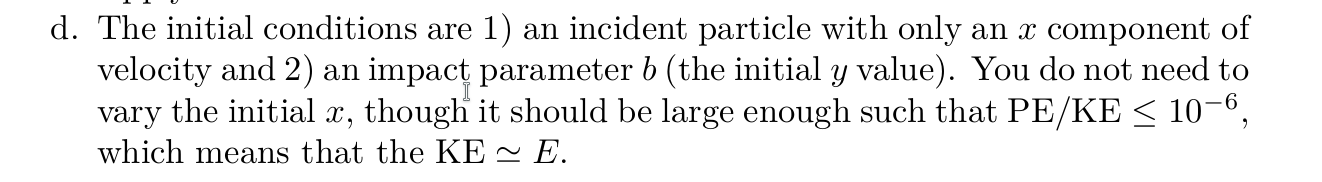

In [0]:
M= 1.0
Em = V(1.0,1.0)
E = 0.260*Em

In [0]:
#Condiciones Iniciales
x01 = 3.0
x02 = b = -0.3905 + 0.0010
v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
v02 = 0.0

In [0]:
mean_div_rk4 = []
dt = [0.1,0.01,0.001,0.0001] # array of time steps
for i in dt:
    sys_rk4 = Particle(x01, x02, v01, v02,RK4)
    y0 = [ x01, x02, v01, v02 ]
    t = np.arange(0,50 + i,i)

    sys_rk4.evolution(t)
    y_od = odeint(sys_rk4.prime, y0, t)
    y_od_x = y_od[:,0]
    y_od_y = y_od[:,1]
    y_od_vx = y_od[:,2]
    y_od_vy = y_od[:,3]
    
    #Divergencias:
    
    sys_rk4.x_diff = np.abs(sys_rk4.x - y_od_x)
    sys_rk4.y_diff = np.abs(sys_rk4.y - y_od_y)
    sys_rk4.vx_diff = np.abs(sys_rk4.vx - y_od_vx)
    sys_rk4.vy_diff = np.abs(sys_rk4.vy - y_od_vy)
    mean_div_rk4.append(np.mean((sys_rk4.x_diff+sys_rk4.y_diff+sys_rk4.vx_diff+sys_rk4.vy_diff)/4))


sys_rk4 = Particle(x01, x02, v01, v02,RK4)

sys_rk4.dt_opt = dt[np.where(mean_div_rk4 == min(mean_div_rk4))[0][0]]
sys_rk4.t_opt = np.arange(0,50+sys_rk4.dt_opt, sys_rk4.dt_opt)
sys_rk4.evolution(sys_rk4.t_opt)
sys_rk4.y_od = odeint(sys_rk4.prime, [x01, x02, v01, v02], sys_rk4.t_opt)
    
sys_rk4.x_diff = np.abs(sys_rk4.x - sys_rk4.y_od[:,0])
sys_rk4.y_diff = np.abs(sys_rk4.y - sys_rk4.y_od[:,1])
sys_rk4.vx_diff = np.abs(sys_rk4.vx - sys_rk4.y_od[:,2])
sys_rk4.vy_diff = np.abs(sys_rk4.vy - sys_rk4.y_od[:,3])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


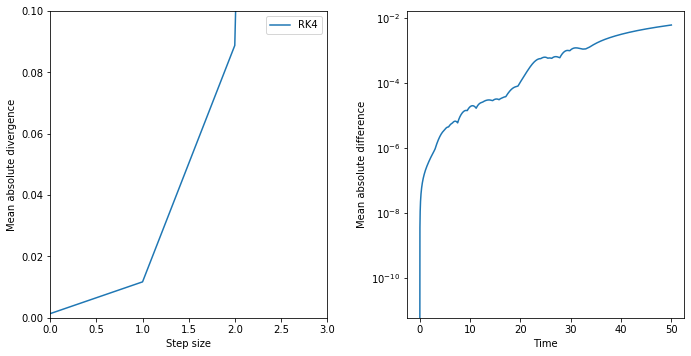

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


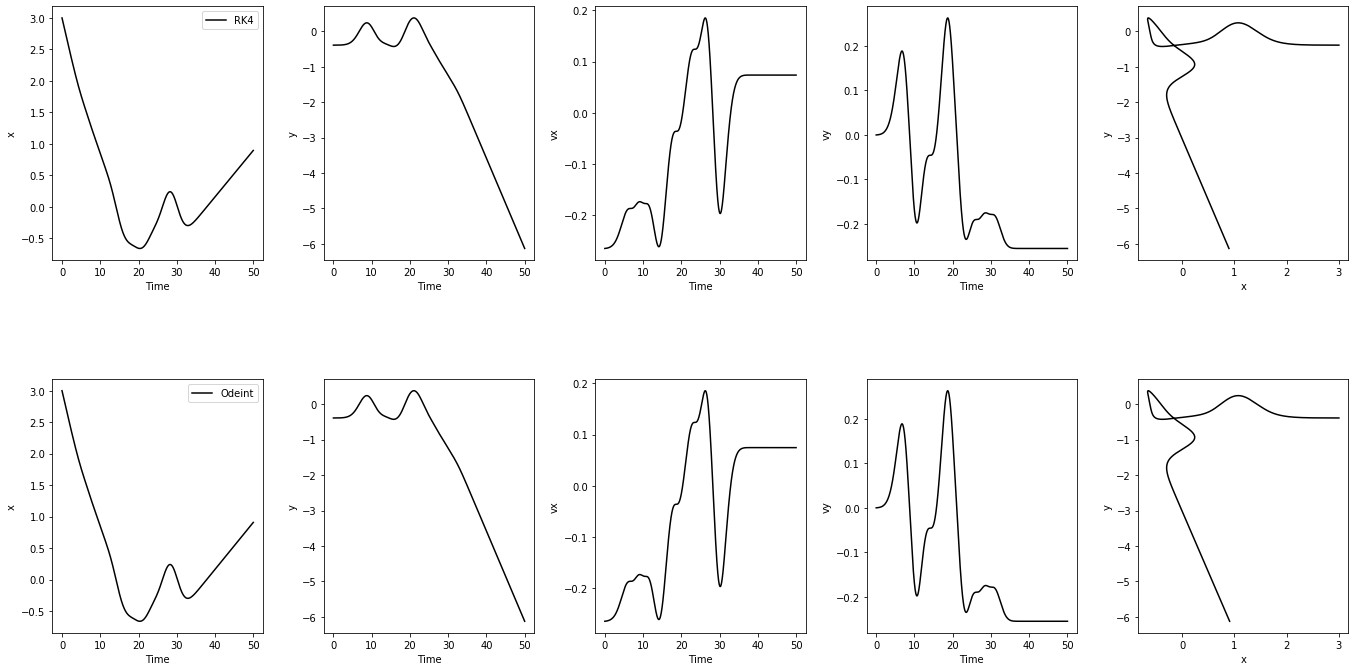

In [0]:
fig_d,ax_d = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
# ------------------------------------------------------------------------------
# Plots

for div,dif,name in zip([mean_div_rk4],[sys_rk4],["RK4"]):
    ax_d[0].plot(range(len(div)),div[::-1],label=name)
    ax_d[1].semilogy(dif.t_opt,np.abs((dif.x_diff + dif.y_diff+dif.vx_diff + dif.vy_diff)/4))

ax_d[0].legend() # allows labels for plots
ax_d[0].set_xlabel("Step size") # x label for divergence plot
ax_d[0].set_ylabel("Mean absolute divergence") # y label for divergence plot
ax_d[0].set_xlim(0,3) # x limits for divergence plot
ax_d[0].set_ylim(0,0.1) # y limits for divergence plot

ax_d[1].set_xlabel("Time") # x label for difference plot
ax_d[1].set_ylabel("Mean absolute difference") # y label for difference plot

fig_d.subplots_adjust(left=0.08,bottom=0.14,right=0.96,top=0.85,wspace=0.29,hspace=0.20) # sets the space configration of the plots on the figure

fig_d.savefig('ConvergenciaRK4.png')
fig_d.savefig('ConvergenciaRK4.pdf')

fig, axes = plt.subplots(2,5,figsize=(20,10)) 

axes[0,0].plot(sys_rk4.t_opt, sys_rk4.x,'-k',label="RK4") 
axes[0,1].plot(sys_rk4.t_opt, sys_rk4.y,'-k') 
axes[0,2].plot(sys_rk4.t_opt, sys_rk4.vx,'-k')
axes[0,3].plot(sys_rk4.t_opt, sys_rk4.vy,'-k') 
axes[0,4].plot(sys_rk4.x, sys_rk4.y,'-k') 
axes[0,0].legend()

axes[0,0].set_ylabel("x") 
axes[0,0].set_xlabel("Time")
axes[0,1].set_ylabel("y") 
axes[0,1].set_xlabel("Time")
axes[0,2].set_ylabel("vx") 
axes[0,2].set_xlabel("Time")
axes[0,3].set_ylabel("vy")
axes[0,3].set_xlabel("Time") 
axes[0,4].set_xlabel("x") 
axes[0,4].set_ylabel("y")

axes[1,0].plot(t, y_od_x,'-k',label="Odeint") 
axes[1,1].plot(t, y_od_y,'-k') 
axes[1,2].plot(t, y_od_vx,'-k')
axes[1,3].plot(t, y_od_vy,'-k') 
axes[1,4].plot(y_od_x, y_od_y,'-k') 
axes[1,0].legend()

axes[1,0].set_ylabel("x") 
axes[1,0].set_xlabel("Time")
axes[1,1].set_ylabel("y") 
axes[1,1].set_xlabel("Time")
axes[1,2].set_ylabel("vx") 
axes[1,2].set_xlabel("Time")
axes[1,3].set_ylabel("vy")
axes[1,3].set_xlabel("Time") 
axes[1,4].set_xlabel("x") 
axes[1,4].set_ylabel("y") 

fig.subplots_adjust(left=0.07,bottom=0.08,right=0.97,top=0.95,wspace=0.29,hspace=0.47)  # sets the space configration of the plots on the figure
fig.savefig('Solution.png')
fig.savefig('Solution.pdf')
plt.show()

In [0]:
M=0.5
#Condiciones Iniciales
x01 = 0.5 #x
x02 = b = -0.2 #y
v01 = 0 #vx
v02 = 0.5 #vy

In [0]:
sys_rk4 = Particle(x01, x02, v01, v02,RK4)
sys_rk4.evolution(t)

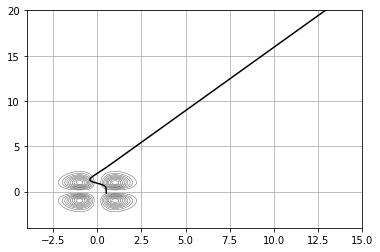

In [0]:
X1,X0=np.ogrid[-4:20:100j,-4:15:100j]
plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.3)
# display grid and fix the coordinate ranges
plt.grid();plt.autoscale(False)
plt.plot(sys_rk4.x, sys_rk4.y,'-k')

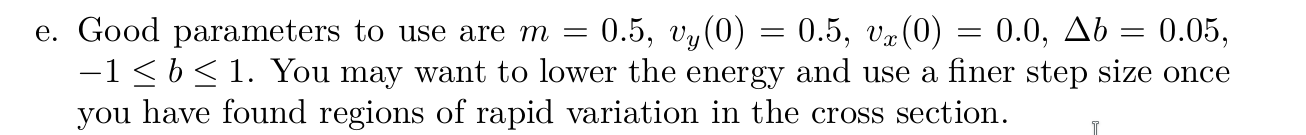

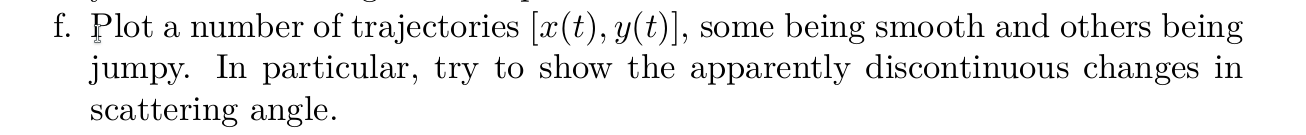

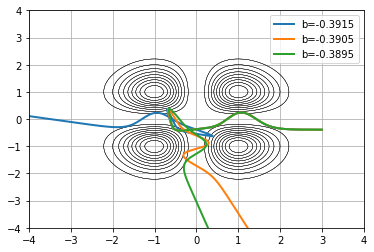

In [0]:
for k in range(-1,1+1):
  x01 = 3.0
  x02 = b = -0.3905 + 0.0010*k;
  v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
  v02 = 0.0
  sys_rk4 = Particle(x01, x02, v01, v02,RK4)
  sys_rk4.evolution(t)
  X1,X0=np.ogrid[-4:4:100j,-4:4:100j]
  plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.3)
  # display grid and fix the coordinate ranges
  plt.grid();plt.autoscale(False)
  plt.plot(sys_rk4.x, sys_rk4.y, label="b=%.4f" % b, linewidth=2)
plt.legend(loc='best')
plt.savefig('XvsYdiffb.png')
plt.savefig('XvsYdiffb.pdf')
plt.show()


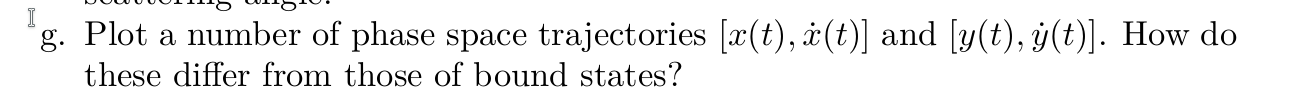

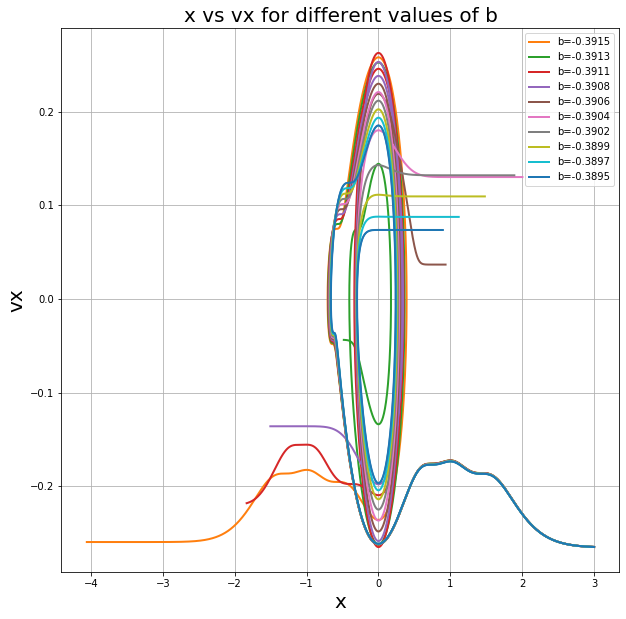

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(sys_rk4.x,sys_rk4.vx)
ax.set_xlabel('x',size=20)
ax.set_ylabel('vx',size=20)
ax.set_title('x vs vx for different values of b',size=20)


B=np.linspace(-1,1,10)
for k in B:
  x01 = 3.0
  x02 = b = -0.3905 + 0.0010*k;
  v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
  v02 = 0.0
  sys_rk4 = Particle(x01, x02, v01, v02,RK4)
  sys_rk4.evolution(t)
  ax.plot(sys_rk4.x,sys_rk4.vx, label="b=%.4f" % b, linewidth=2)
plt.savefig('XvsVx.png')
plt.savefig('XvsVx.pdf')
plt.legend(loc='best')
plt.grid()
plt.show()


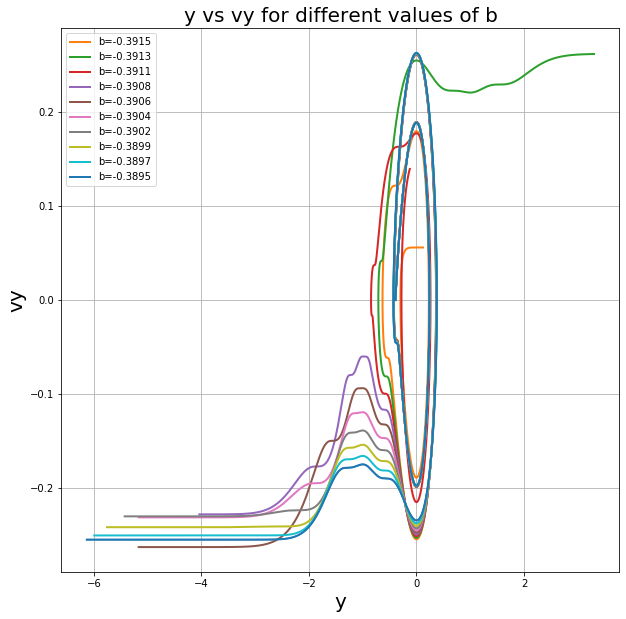

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(sys_rk4.y,sys_rk4.vy)
ax.set_xlabel('y',size=20)
ax.set_ylabel('vy',size=20)
ax.set_title('y vs vy for different values of b',size=20)


B=np.linspace(-1,1,10)
for k in B:
  x01 = 3.0
  x02 = b = -0.3905 + 0.0010*k;
  v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
  v02 = 0.0
  sys_rk4 = Particle(x01, x02, v01, v02,RK4)
  sys_rk4.evolution(t)
  ax.plot(sys_rk4.y,sys_rk4.vy, label="b=%.4f" % b, linewidth=2)
plt.savefig('YvsVy.png')
plt.savefig('YvsVy.pdf')
plt.legend(loc='best')
plt.grid()
plt.show()

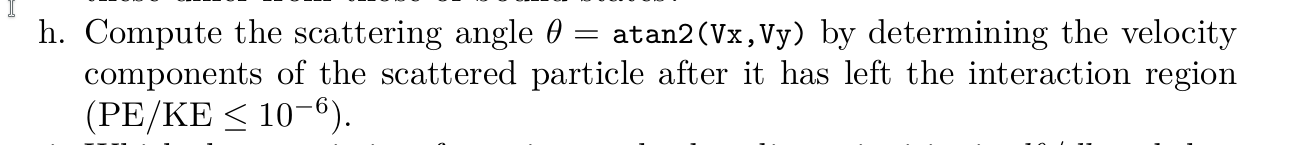

In [0]:
Theta=[]
for i in range(len(sys_rk4.vx)):
  T=math.atan2(sys_rk4.vx[i], sys_rk4.vy[i])
  T=math.degrees(T)
  T=np.abs(T)
  Theta.append(T)

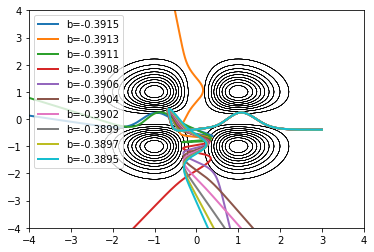

In [0]:
B=np.linspace(-1,1,10)
for k in B:
  x01 = 3.0
  x02 = b = -0.3905 + 0.0010*k;
  v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
  v02 = 0.0
  sys_rk4 = Particle(x01, x02, v01, v02,RK4)
  sys_rk4.evolution(t)
  X1,X0=np.ogrid[-4:4:100j,-4:4:100j]
  plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.3)
  # display grid and fix the coordinate ranges
  plt.grid();plt.autoscale(False)
  plt.plot(sys_rk4.x, sys_rk4.y, label="b=%.4f" % b, linewidth=2)
plt.legend(loc='best')
plt.savefig('XvsYdiffb2.png')
plt.savefig('XvsYdiffb2.pdf')
plt.show()


In [0]:
b_0

[-0.3915,
 -0.3912777777777778,
 -0.39105555555555555,
 -0.39083333333333337,
 -0.39061111111111113,
 -0.3903888888888889,
 -0.39016666666666666,
 -0.3899444444444445,
 -0.38972222222222225,
 -0.3895]

In [0]:
B=np.linspace(-1,1,10)
Theta=[]
b_0=[]
VX=[]
VY=[]
for k in B:
  x01 = 3.0
  x02 = b = -0.3905 + 0.0010*k;
  b_0.append(b)
  v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5
  v02 = 0.0
  sys_rk4 = Particle(x01, x02, v01, v02,RK4)
  sys_rk4.evolution(t)
  VX.append(sys_rk4.vx[-1])
  VY.append(sys_rk4.vy[-1])
  #T=math.atan2(sys_rk4.vx[-1], sys_rk4.vy[-1])
  #T=math.degrees(T)
  #Theta.append(T)

#plt.legend(loc='best')
#plt.savefig('XvsYdiffb.png')
#plt.savefig('XvsYdiffb.pdf')
#plt.show()


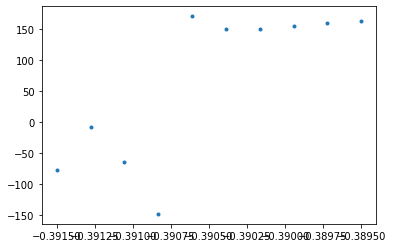

In [0]:
Theta=[]
for i in range(len(VX)):
  T=math.atan2(VX[i], VY[i])
  T=math.degrees(T)
  #T=np.abs(T)
  Theta.append(T)
plt.plot(b_0,Theta,".")

In [0]:
T=math.atan2(sys_rk4.vx[-1], sys_rk4.vy[-1])
print(sys_rk4.vx[0], sys_rk4.vy[0],T)

-0.37439225298889506 0.0 2.8613390278827153


In [0]:
#Descargar Imagenes
from google.colab import files
import os
print( os.getcwd() )
print( os.listdir() )
#files.download( "XvsYdiffb.png" )
#files.download( "XvsYdiffb.pdf" )
files.download( 'XvsVx.png' )
files.download( 'XvsVx.pdf' )
#files.download( 'Potential.png' )
#files.download( 'Potential.pdf' )

/content
['.config', 'XvsYdiffb.png', 'Solution.pdf', 'YvsVy.pdf', 'XvsVx.pdf', 'XvsVx.png', 'Solution.png', 'XvsYdiffb2.png', 'Potential.png', 'XvsYdiffb.pdf', 'ConvergenciaRK4.png', 'XvsYdiffb2.pdf', 'Potential.pdf', 'ConvergenciaRK4.pdf', 'YvsVy.png', 'sample_data']


/content
['.config', 'IM1.pdf', 'IM1.png', 'IM.png', 'IM.pdf', 'sample_data']


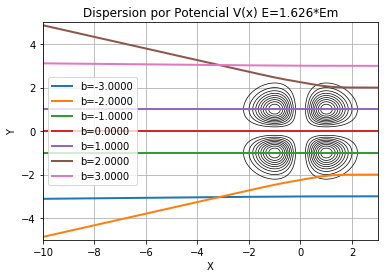

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from google.colab import files
import os
import math
print(os.getcwd())
print(os.listdir())

# capture the structure of the potential
f  = lambda     r :     r*np.exp(-r);
df = lambda     r : (1-r)*np.exp(-r);
V  = lambda y1,y2 : f(y1*y1)*f(y2*y2);

M= 1.0
Em = V(1.0,1.0);
E = 1.626*Em;

def prime(y):
    x1,x2,v1,v2 = y        
    dV_dx1 = 2*x1*df(x1*x1)*f(x2*x2);
    dV_dx2 = 2*x2*df(x2*x2)*f(x1*x1);
    return [ v1, v2, -dV_dx1/M, -dV_dx2/M ];

# prepare and draw the contour plot
X1,X0=np.ogrid[-4:3:100j,-4:3:100j]
plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.7)
# display grid and fix the coordinate ranges
plt.grid()

for b in np.linspace(-3,3,7):

    x01 = 3.0; 
    x02 = b 
    v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5; 
    v02 = 0.0; 
    #print "initial position (%.4f, %.4f), initial velocity (%.4f, %.4f)" % ( x01, x02, v01, v02 )

    t0 = 0.0
    tf = 50.0
    tol = 1e-10
    y0 = [ x01, x02, v01, v02 ]
    t = np.linspace(t0,tf,501)
    h = (t[-1] - t[0])/len(t)
    y1 = odeint(lambda y,t: prime(y) , y0, t)
    plt.plot(y1[:,0], y1[:,1], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,2], y1[:,3], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,0], y1[:,2], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,1], y1[:,3], label="b=%.4f" % b, linewidth=2)

plt.title("Dispersion por Potencial V(x) E=1.626*Em")
plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.xlim(-10,3)
plt.ylim(-5,5)
plt.savefig("IM.png")
plt.savefig("IM.pdf")

plt.show()



In [0]:
files.download("IM.png")
files.download("IM.pdf")

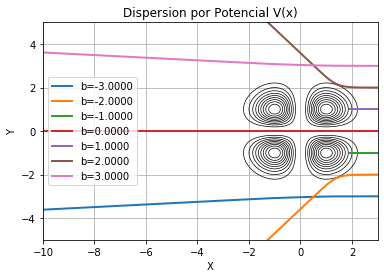

In [0]:
M= 1.0
Em = V(1.0,1.0);
E = 0.260*Em;

def prime(y):
    x1,x2,v1,v2 = y        
    dV_dx1 = 2*x1*df(x1*x1)*f(x2*x2);
    dV_dx2 = 2*x2*df(x2*x2)*f(x1*x1);
    return [ v1, v2, -dV_dx1/M, -dV_dx2/M ];

# prepare and draw the contour plot
X1,X0=np.ogrid[-4:3:100j,-4:3:100j]
plt.contour(X0.ravel(), X1.ravel(), V(X0,X1), Em*np.arange(0,1,0.1), colors='k', linewidths=0.7)
# display grid and fix the coordinate ranges
plt.grid()

for b in np.linspace(-3,3,7):

    x01 = 3.0; 
    x02 = b 
    v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5; 
    v02 = 0.0; 
    #print "initial position (%.4f, %.4f), initial velocity (%.4f, %.4f)" % ( x01, x02, v01, v02 )

    t0 = 0.0
    tf = 50.0
    tol = 1e-10
    y0 = [ x01, x02, v01, v02 ]
    t = np.linspace(t0,tf,501)
    h = (t[-1] - t[0])/len(t)
    y1 = odeint(lambda y,t: prime(y) , y0, t)
    plt.plot(y1[:,0], y1[:,1], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,2], y1[:,3], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,0], y1[:,2], label="b=%.4f" % b, linewidth=2)
    #plt.plot(y1[:,1], y1[:,3], label="b=%.4f" % b, linewidth=2)
plt.title("Dispersion por Potencial V(x)")
#plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.xlim(-10,3)
plt.ylim(-5,5)
plt.savefig("IM1.png")
plt.savefig("IM1.pdf")
plt.show()


In [0]:
files.download("IM1.png")
files.download("IM1.pdf")

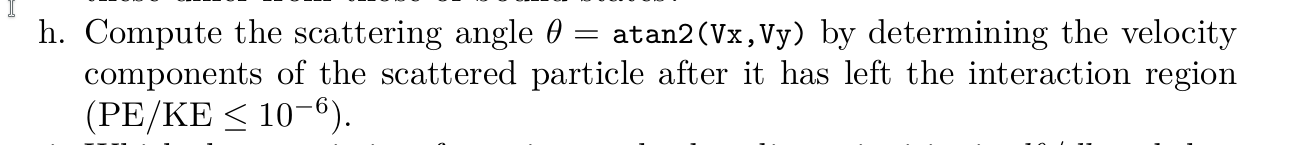

In [0]:

M= 1.0
Em = V(1.0,1.0);
E = 1.626*Em;
Theta=[]

B=np.linspace(-2,2,100)
B1=np.linspace(-1.1,-0.9,50)
B2=np.linspace(0.9,1.1,50)
B3=np.linspace(-1.1,-0.5,100)
B4=np.linspace(0.5,1.1,100)
B=np.append(B,B1)
B=np.append(B,B2)
B=np.append(B,B3)
B=np.append(B,B4)
#B=np.linspace(0.5,1.1,100)


for b in B:

    x01 = 3.0; 
    x02 = b 
    v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5; 
    v02 = 0.0; 
    #print "initial position (%.4f, %.4f), initial velocity (%.4f, %.4f)" % ( x01, x02, v01, v02 )

    t0 = 0.0
    tf = 30.0
    tol = 1e-10
    y0 = [ x01, x02, v01, v02 ]
    t = np.linspace(t0,tf,10000)
    h = (t[-1] - t[0])/len(t)
    y1 = odeint(lambda y,t: prime(y) , y0, t)
    #plt.plot(y1[:,0], y1[:,1], label="b=%.4f" % b, linewidth=2)
    T=math.atan2(y1[-1,0], y1[-1,1])
    #T=math.degrees(T)
    #print(T)
    Theta.append(T)


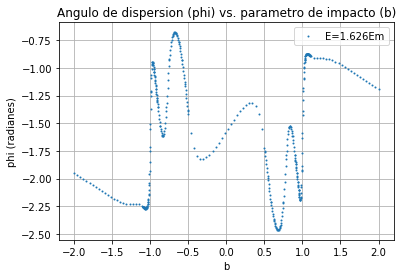

In [0]:
plt.plot(B,Theta,".",markersize=2,label="E=1.626Em" )

plt.title("Angulo de dispersion (phi) vs. parametro de impacto (b)")
plt.legend(loc="best")
plt.xlabel("b")
plt.ylabel("phi (radianes)")
plt.grid(True)

plt.savefig("IM2.png")
plt.savefig("IM2.pdf")
plt.show()

In [0]:
files.download("IM2.png")
files.download("IM2.pdf")

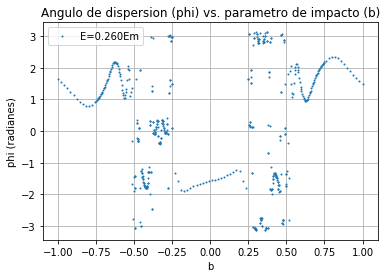

In [0]:
M= 1.0
Em = V(1.0,1.0);
E = 0.260*Em;
Theta=[]
B=[]
B=np.linspace(-1,1,100)
B1=np.linspace(-0.75,-0.25,100)
B2=np.linspace(0.25,0.75,100)
B3=np.linspace(-0.5,-0.25,100)
B4=np.linspace(0.25,0.5,100)
B=np.append(B,B1)
B=np.append(B,B2)
B=np.append(B,B3)
B=np.append(B,B4)
#B=np.linspace(0.5,1.1,100)


for b in B:

    x01 = 3.0; 
    x02 = b 
    v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5; 
    v02 = 0.0; 
    #print "initial position (%.4f, %.4f), initial velocity (%.4f, %.4f)" % ( x01, x02, v01, v02 )

    t0 = 0.0
    tf = 50.0
    tol = 1e-10
    y0 = [ x01, x02, v01, v02 ]
    t = np.linspace(t0,tf,1000)
    h = (t[-1] - t[0])/len(t)
    y1 = odeint(lambda y,t: prime(y) , y0, t)
    #plt.plot(y1[:,0], y1[:,1], label="b=%.4f" % b, linewidth=2)
    T=math.atan2(y1[-1,0], y1[-1,1])
    #T=math.degrees(T)
    #print(T)
    Theta.append(T)
plt.plot(B,Theta,".",markersize=2,label="E=0.260Em" )
plt.title("Angulo de dispersion (phi) vs. parametro de impacto (b)")
plt.legend(loc="best")
plt.xlabel("b")
plt.ylabel("phi (radianes)")
plt.grid(True)
plt.savefig("IM3.png")
plt.savefig("IM3.pdf")
plt.show()

In [0]:
files.download("IM3.png")
files.download("IM3.pdf")

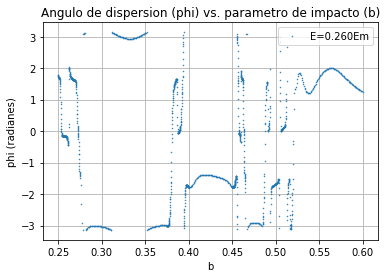

In [0]:
M= 1.0
Em = V(1.0,1.0);
E = 0.260*Em;
Theta=[]

B=np.linspace(0.25,0.6,500)
B1=np.linspace(0.25,0.275,200)
B2=np.linspace(0.375,0.4,200)
B3=np.linspace(0.45,0.465,200)
B4=np.linspace(0.485,.52,200)
B=np.append(B,B1)
B=np.append(B,B2)
B=np.append(B,B3)
B=np.append(B,B4)
#B=np.linspace(0.5,1.1,100)


for b in B:

    x01 = 3.0; 
    x02 = b 
    v01 = -( ( E-V(x01,x02) )*2.0/M )**0.5; 
    v02 = 0.0; 
    #print "initial position (%.4f, %.4f), initial velocity (%.4f, %.4f)" % ( x01, x02, v01, v02 )

    t0 = 0.0
    tf = 30.0
    tol = 1e-10
    y0 = [ x01, x02, v01, v02 ]
    t = np.linspace(t0,tf,10000)
    h = (t[-1] - t[0])/len(t)
    y1 = odeint(lambda y,t: prime(y) , y0, t)
    #plt.plot(y1[:,0], y1[:,1], label="b=%.4f" % b, linewidth=2)
    T=math.atan2(y1[-1,0], y1[-1,1])
    #T=math.degrees(T)
    #print(T)
    Theta.append(T)
plt.plot(B,Theta,".",markersize=1,label="E=0.260Em")
plt.title("Angulo de dispersion (phi) vs. parametro de impacto (b)")
plt.legend(loc="best")
plt.xlabel("b")
plt.ylabel("phi (radianes)")
plt.grid(True)
plt.savefig("IM4.png")
plt.savefig("IM4.pdf")
plt.show()
plt.show()

In [0]:
files.download("IM4.png")
files.download("IM4.pdf")